In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Preview

In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### from above we can also see that we have missing values in - Age, Cabin, Embarked columns.
* Missing values of Cabin and Embarked will not be fixed  because Because they don't matter now
* Missing values of Age will be fixed now - because involved in various positions and analysis below.

### Fix missing ages
* For this we can replace the missing values with the mean.
* To have best representative values populated - we will taken mean based on Sex and Pclass

In [ ]:
mean_age = titanic_df.groupby(['Sex','Pclass'])['Age'].mean()
mean_age

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [ ]:
# function to fill the NaN values for Age column
def replace_nan_age(df):
    if pd.isnull(df['Age']):
        return mean_age[df['Sex'], df['Pclass']]
    else:
        return df['Age']

titanic_df['Age'] = titanic_df.apply(replace_nan_age, axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#  Now , we can see that the missing ages have been filled.

## Visualization phase:

In [ ]:
#let's study the distribution of the most important features based on your understanding of the dataset and the problem.

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Number of parents / children aboard')

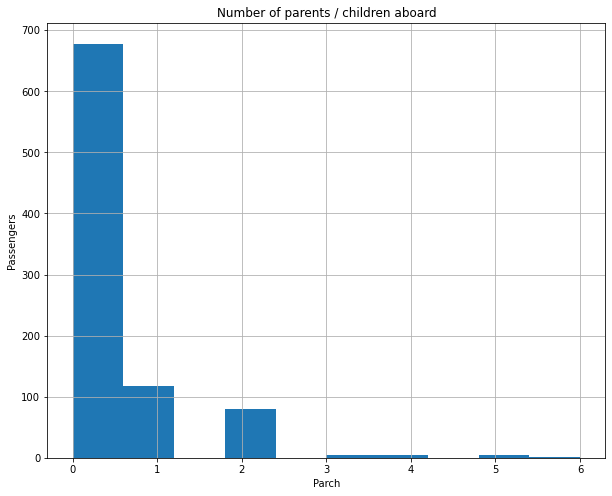

In [ ]:
# Parch
plt.figure(figsize = (10,8))
titanic_df.Parch.hist()
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.title('Number of parents / children aboard')

Text(0.5, 1.0, 'Number of Siblings / Spouses aboard')

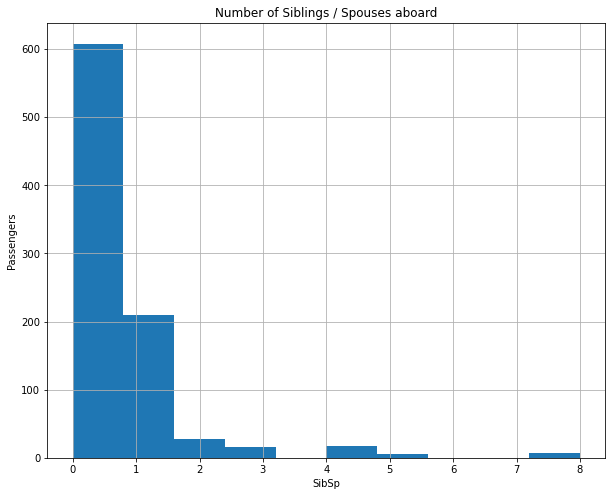

In [ ]:
#SibSp
plt.figure(figsize = (10,8))
titanic_df.SibSp.hist()
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.title('Number of Siblings / Spouses aboard')

###  From the above we  see :
  * Oldest passenger was 80 years old
  * Youngest passenger was about 5 months old
  *  Average age of passengers was 29.32 - but note this also has missing ages
  --> so age group had  an effect on  survival possibility 
  * Mean survival is 0.3838
  -->  from this percentage ,we can see that there are a lot of features that effect on  survival possibility 
  * Maximum number of Siblings / Spouses were 8
  * Maximum number of Parent / Child were 6

In [ ]:
# Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

### Sex
### Which gender had more survival?

In [ ]:
## CALCULATE SURVIVED AND TOTAL BY SEX

# group the data by Sex
group_by_sex = titanic_df.groupby('Sex')

# calculate survived by sex
survived_by_sex = group_by_sex['Survived'].sum()
survived_by_sex.name = 'Survived'
print(survived_by_sex)

# calculate total by sex
total_by_sex = group_by_sex['Survived'].size()
total_by_sex.name = 'Total'
print(total_by_sex)

# concat the separate results into dataframe to see the effect of gender
survived_total_by_sex = pd.concat([survived_by_sex, total_by_sex], axis=1)
survived_total_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64
Sex
female    314
male      577
Name: Total, dtype: int64


,Survived,Total
Sex,,
female,233,314
male,109,577


In [ ]:
# the persentage of survived  persons by sex
percent_survived = (survived_total_by_sex['Survived'] / survived_total_by_sex['Total']) * 100
survived_total_by_sex['Percentage'] = percent_survived
survived_total_by_sex

,Survived,Total,Percentage
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


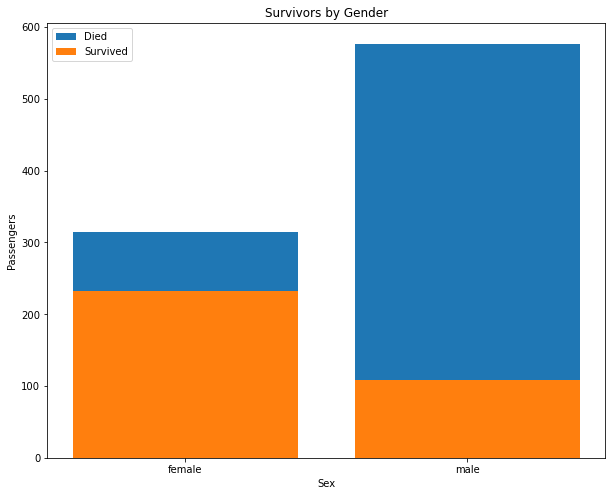

In [ ]:
# lets visualize the resut
x = range(len(survived_total_by_sex.index.values))
St = survived_total_by_sex.Total
Ss = survived_total_by_sex.Survived
plt.figure(figsize = (10,8))

fig_St = plt.bar(x, St)
fig_Ss = plt.bar(x, Ss)

plt.xticks(x, survived_total_by_sex.index.values)
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.title('Survivors by Gender')

plt.legend([fig_St,fig_Ss],['Died', 'Survived'])

### From the visualization and percentage of survival from the dataframe:
  * females had very high rate of survival.
  * female survival rate was about 4 times that of males
  * we can conclude that :
   females were given preference in rescue operations, and males must have sacrificed themselves to let the females survive.
  

### gender age distribution

In [ ]:
male_ages = (titanic_df[titanic_df['Sex'] == 'male'])['Age']
male_ages.describe()

count    577.000000
mean      30.423672
std       13.264336
min        0.420000
25%       23.000000
50%       27.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
female_ages = (titanic_df[titanic_df['Sex']== 'female'])['Age']
female_ages.describe()

count    314.000000
mean      27.288063
std       13.091327
min        0.750000
25%       21.000000
50%       24.000000
75%       35.000000
max       63.000000
Name: Age, dtype: float64

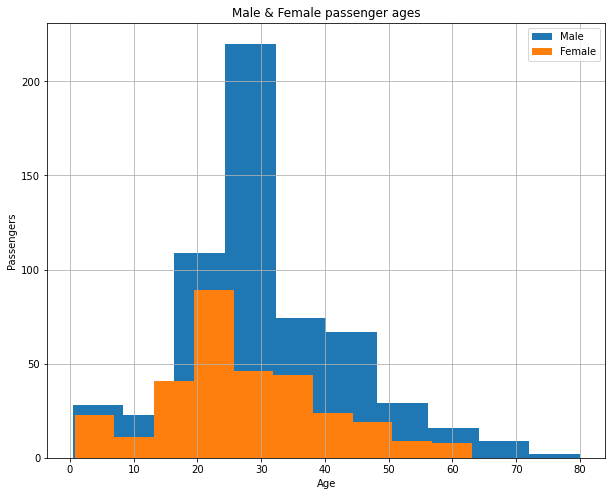

In [ ]:
plt.figure(figsize = (10,8))


male_ages.hist(label='Male')
female_ages.hist(label='Female')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Male & Female passenger ages')
plt.legend(loc='best')

### From above distribution, we can see that:

  * For every age group the number of females was less than number of males
  * The age of oldest female was 63, whereas age of oldest male was 80
  * we can see that most survivors were from 20-29 age group because they were in good health , so age group must be taking   into consideration

In [ ]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanic_df['AgeGroup'] = titanic_df.Age.apply(age_group)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [ ]:
age_group = titanic_df.AgeGroup.unique()
age_labels = sorted(age_group)

Text(0.5, 1.0, 'Survivors by Gender by Age groups')

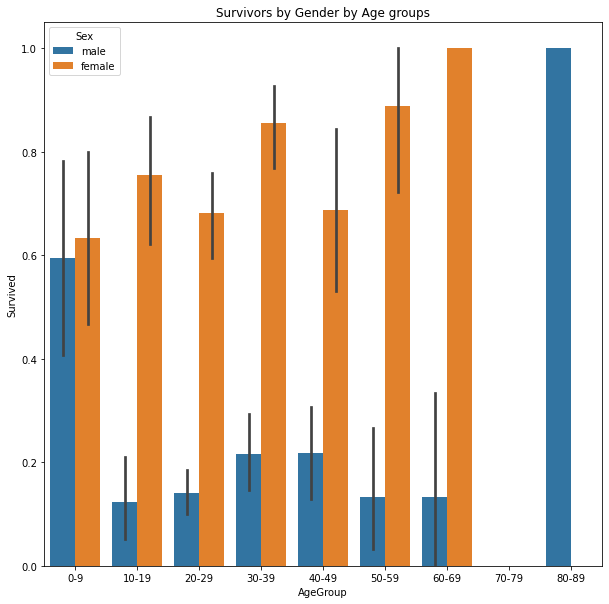

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x='AgeGroup', y='Survived', data=titanic_df, hue='Sex',order=age_labels)
ax.set_title('Survivors by Gender by Age groups')

### From this graph taking into consideration the gender and age group:

   * it is clearly visible that female and children were given preference in rescue operations by the other male passengers
   * 0-9 age group both male and female children had very high rate of survival.

In [ ]:
# Pick two other features and study their impact on the survival of the individuals.

### passenger class

In [ ]:
##  DataFrame for just the necessary Data

survived_pclass_df = titanic_df[['Survived', 'Pclass']]          
survived_pclass_df.head()

## GROUP DATA TO CALCULATE SURVIVED & TOTAL BY PCLASS

## calculate survived by pclass
survived_by_pclass = survived_pclass_df.groupby(['Pclass']).sum()
total_by_pclass = survived_pclass_df.groupby(['Pclass']).count()

# the second column represent the total number of persons for this class to we have to rename it
total_by_pclass.rename(columns = {'Survived':'Total'}, inplace = True) 

# merge separate data into one dataframe
survived_total_by_pclass = pd.merge(survived_by_pclass, total_by_pclass, left_index=True, right_index=True) # merge by index
survived_total_by_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [ ]:
survived_total_by_pclass['Percentage'] = (survived_total_by_pclass['Survived'] / survived_total_by_pclass['Total']) * 100

survived_total_by_pclass

,Survived,Total,Percentage
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


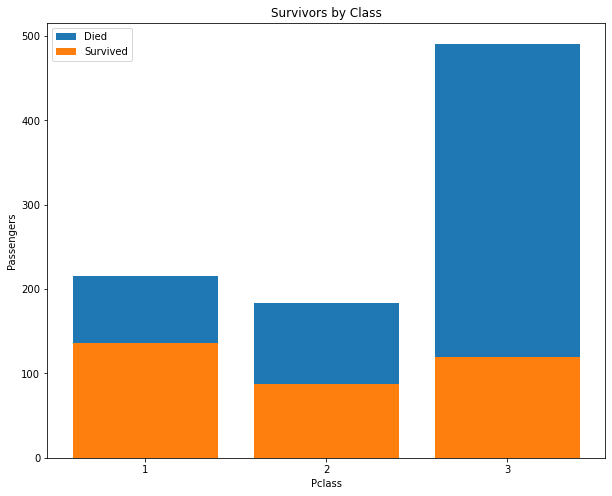

In [ ]:
x = survived_total_by_pclass.index.values
Stt = survived_total_by_pclass.Total
Sts = survived_total_by_pclass.Survived
plt.figure(figsize= (10,8) )
fig_Stt = plt.bar(x, Stt)
fig_Sts = plt.bar(x, Sts)

plt.xticks(x, x)
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.title('Survivors by Class')


plt.legend([fig_Stt,fig_Sts],['Died', 'Survived'])

### From this graph:
 * 1st Class passengers had highest rate of survival, then 2nd class passengers, and the last was of 3rd class passengers.
 * most of the travelers were in the 3rd class aproximately 500 but only few of them 24.236253 % had been survived

#### from the previous analysics for pclass, we can notice :
   * a relation between pclass and fare and survived:
   * higher fares, higher survival rate.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


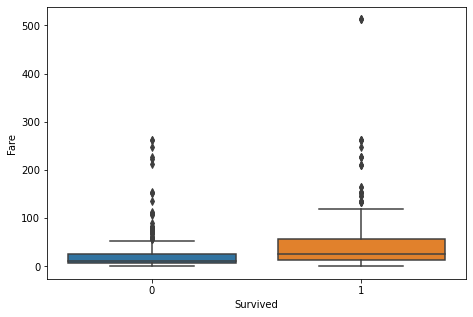

In [ ]:

plt.figure(figsize=(7.5,5))
sns.boxplot(titanic_df['Survived'], titanic_df['Fare']);

####  from this graph , we can notice :
*  'Fare' doesn't make difference
* the higher the fare, the higher the chances of survival no matter if you were traveling in 1st ,2nd or 3rd class



###  Embarked ,Survived

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


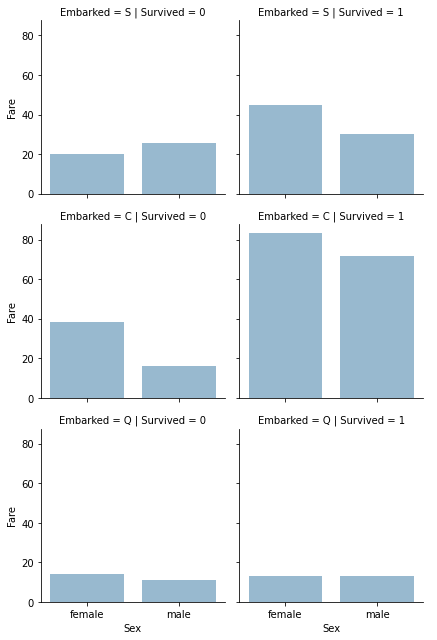

In [ ]:
grid = sns.FacetGrid(titanic_df, row = 'Embarked', col = 'Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)
grid.add_legend()

### From the graghs , we can see that :
 * Embarked seems to be correlated with survival, depending on the gender.
 * Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C.
 * Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

In [ ]:
# Try running the function, analyze what it does exactly and its utilities

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

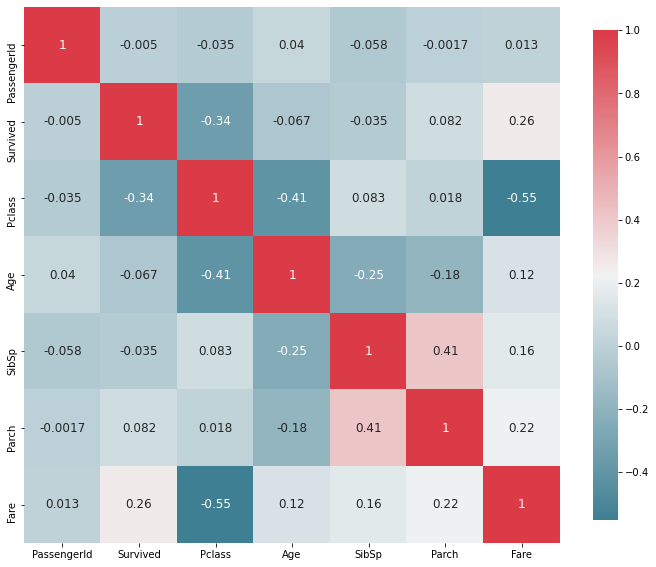

In [ ]:
#calling the function
plot_correlation_map(titanic_df)

### From the graph we can see that:
    --> Positive Correlation Features:
    
    
* Fare and Survived: 0.26
    
    
    --> Negative Correlation Features:

* Fare and Pclass: -0.6
* Sex and Survived: -0.55
* Pclass and Survived: -0.33

### decribing analysis:
* We have found some  strong relationships between different features:


*   There is a definite positive correlation between Fare and Survived rated.
    from this relationship we can conclude that he passenger who paid more money for their ticket were more likely                 to survive. 
              
              
*   we have a negative coorelation between Fare and Pclass(-0.6)
    this This relationship can be explained by saying that first class passenger(1) paid more for fare then second                 class passenger(2), similarly second class passenger paid more than the third class passenger(3).
              
*   the previous theory of coorelation can also be mentioned  between Pclass and Survived of  -0.33. 
    This can also be explained by saying that first class passenger had a better chance of surviving than                           the second or the third and so on.

In [ ]:
# Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [ ]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### We observe significant correlation (>0.5) among Pclass=1 and Survived 

In [ ]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [ ]:
titanic_df['Title'] = titanic_df['Name'].apply(get_title)

In [ ]:
titanic_df['Title'] = pd.DataFrame(titanic_df['Title'])

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,20-29,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,30-39,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,30-39,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,30-39,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,20-29,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,10-19,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,20-29,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,20-29,Mr


In [ ]:
titanic_df.drop(['Name'],axis = 1,inplace = True)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,30-39,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,30-39,Mr


In [ ]:
# Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)

In [ ]:
titanic_df['Title']= titanic_df['Title'].astype('category')
titanic_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
AgeGroup         object
Title          category
dtype: object

In [ ]:
titanic_df['Title_Num'] = titanic_df['Title'].cat.codes
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,Title_Num
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,Mr,11
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,Mrs,12
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,Miss,8
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,30-39,Mrs,12
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,30-39,Mr,11


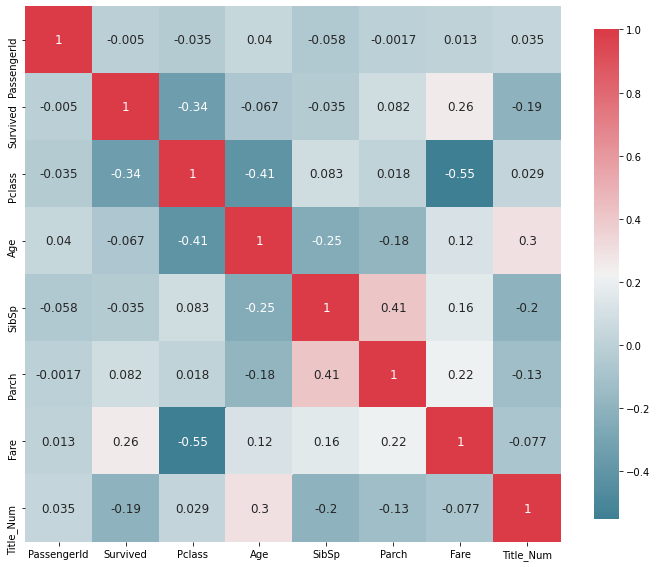

In [ ]:
#calling the function again
plot_correlation_map(titanic_df)

In [ ]:
# let's visualize the same correlations using these new titles now.

In [ ]:
titanic_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Title, dtype: int64

In [ ]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [ ]:
titanic_df = titanic_df.replace(Title_Dictionary)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,Title_Num
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,Mrs,11
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,Mrs,12
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,Miss,8
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,30-39,Mrs,12
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,30-39,Mrs,11


In [ ]:
titanic_df['Title']= titanic_df['Title'].astype('category')

In [ ]:
titanic_df['Title'] = titanic_df['Title'].cat.codes
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,Title_Num
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,2,11
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,2,12
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,1,8
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,30-39,2,12
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,30-39,2,11


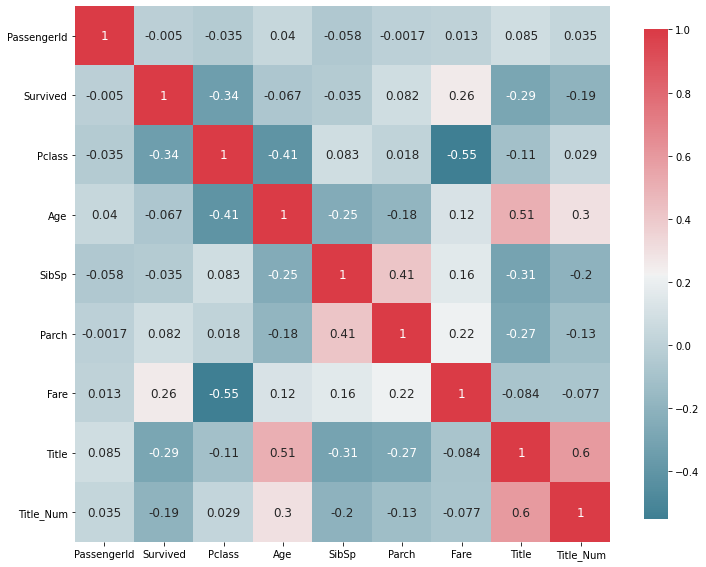

In [ ]:
plot_correlation_map(titanic_df)

In [ ]:
# Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

In [ ]:
family= []

for index, row in titanic_df.iterrows():
    family.append((row['SibSp'] + row['Parch']+1))



In [ ]:
titanic_df['FamilySize'] =  family
titanic_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
# Use what you have learned so far to conclude if this feature is useful or not.

*  by creating a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.
* Regarding family size, we can suppose  that those who travel alone, have a lower survival rate. The idea is that people with family can collaborate and help each other escaping.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


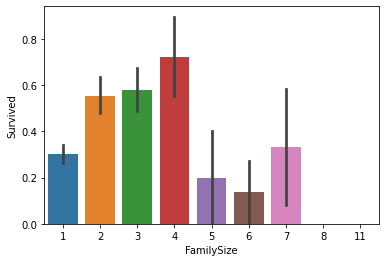

In [ ]:
# checking our supposition
sns.barplot(titanic_df['FamilySize'], titanic_df['Survived']);

#### from this graph:
* when 'FamilySize' is between 0 and 3, our hypothesis is verified.
* when FamilySize is between 4 and 10, things start to change
* so our hypothesis is right only when 'FamilySize' is between 0 and 3 otherwise it's must be revised 
* so we can't say that 'FamilySize' is an important feauture is 'FamilySize' is above 3
